# Peer-graded Assignment: Test a Multiple Regression Model 

Instructions

This week's assignment is to test a multiple regression model.

Data preparation for this assignment:

If your response variable is categorical, you will need to identify a quantitative variable in the data set that you can use as a response variable for this assignment. Variables with response scales with 4-5 values that represent a change in magnitude (eg, "strongly disagree to strongly agree", "never to often") can be considered quantitative for the assignment.

The assignment:

Write a blog entry that summarize in a few sentences:

1. what you found in your multiple regression analysis. Discuss the results for the associations between all of your explanatory variables and your response variable. Make sure to include statistical results (Beta coefficients and p-values) in your summary. 
2. Report whether your results supported your hypothesis for the association between your primary explanatory variable and the response variable. 
3. Discuss whether there was evidence of confounding for the association between your primary explanatory and response variable (Hint: adding additional explanatory variables to your model one at a time will make it easier to identify which of the variables are confounding variables); and 
4. generate the following regression diagnostic plots:

a) q-q plot

b) standardized residuals for all observations

c) leverage plot

d) Write a few sentences describing what these plots tell you about your regression model in terms of the distribution of the residuals, model fit, influential observations, and outliers.

What to Submit: Submit the URL for your blog entry. The blog entry should include 1) the summary of your results that addresses parts 1-4 of the assignment, 2) the output from your multiple regression model, and 3) the regression diagnostic plots.

Review criteria

Your assessment will be based on the evidence you provide that you have completed all of the steps. When relevant, gradients in the scoring will be available to reward clarity (for example, you will get one point for submitting an inaccurate or incomplete description of your results, but two points if the description is accurate and complete). In all cases, consider that the peer assessing your work is likely not an expert in the field you are analyzing. You will be assessed equally on all parts of the assignment, and whether you post your output in your blog entry.
Example of how to write multiple regression results

After adjusting for potential confounding factors (list them), major depression (Beta=1.34, p=.0001) was significantly and positively associated with number of nicotine dependence symptoms. Age was also significantly associated with nicotine dependence symptoms, such that older participants reported a greater number of nicotine dependence symptoms (Beta= 0.76, p=.025). 

## Codebook:
    
Selected X variables:

* mpaa_rating: MPAA rating of the movie (G, PG, PG-13, R, Unrated)
* thtr_rel_month: Month the movie is released in theaters
* critics_score: Critics score on Rotten Tomatoes
* aggregated variable "wins" by combine all wins and nominations of: (1 point for a "yes")
    * best_pic_nom: Whether or not the movie was nominated for a best picture Oscar (no, yes)
    * best_pic_win: Whether or not the movie won a best picture Oscar (no, yes)
    * best_actor_win: Whether or not one of the main actors in the movie ever won an Oscar (no, yes) – note that this is not necessarily whether the actor won an Oscar for their role in the given movie
    * best_actress win: Whether or not one of the main actresses in the movie ever won an Oscar (no, yes) – not that this is not necessarily whether the actresses won an Oscar for their role in the given movie
    * best_dir_win: Whether or not the director of the movie ever won an Oscar (no, yes) – not that this is not necessarily whether the director won an Oscar for the given movie


Selected y variable:
* imdb_rating: Rating on IMDB

Alternative y variable:
* audience_score: Audience score on Rotten Tomatoes


More on mpaa_rating:

* Rated G: General Audiences – all ages admitted
* Rated PG: Parental Guidance Suggested – some material may not be suitable for children
* Rated PG-13: Parents Strongly Cautioned – some material may be inappropriate for children under 13
* Rated R: Restricted – under 17 requires accompanying parent or adult guardian
* Rated NC-17: No children under 17 admitted [1990–1996] / No one 17 and under admitted [1996–present]

# Discussion

* In the previous week, I already knew that IMDB user's ratings (imdb_rating) and Rotten Tomatoes's counterpart (audience_score) are highly correlated (R squared is 0.748). Here I will try NOT to use audience_score as it will drawf other variables.
* The data set we use is from a Duke University's statistics class and if you want to learn more about it, [here are my previous assignments](https://github.com/jeremy886/learn_datascience/tree/master/statistics/Regression%20Modeling%20in%20Practice)
* I basically use the same analysis procedures demonstrated in the lectures to help myself understand the conecpts and techniques.

## Variables:

y: (response variable) - still imdb_rating
    I could have chosen "audience_score" as an alternative because they are both user's ratings on movies.

X: (explanatory variables)
    I have to test a range of them. Here I take:
    - critics_score: I expect this one will be highly significant
    - wins: I aggregate all Oscar awards related wins and nominations into one single variable
    - mpaa_rating: my experience tells me a more restricted rating can be more "appealling" to the audience so I want to see if it's significant.
    - thtr_rel_month: I heard that the timing of movie release is strategic so I am curious if it's significant.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
import scipy
from sklearn.preprocessing import scale

%matplotlib inline

/Users/apple/anaconda3/envs/deep/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
movies_raw = pd.read_feather('../../datasets/movies.feather')

In [3]:
movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 32 columns):
title               651 non-null object
title_type          651 non-null category
genre               651 non-null category
runtime             650 non-null float64
mpaa_rating         651 non-null category
studio              643 non-null category
thtr_rel_year       651 non-null float64
thtr_rel_month      651 non-null float64
thtr_rel_day        651 non-null float64
dvd_rel_year        643 non-null float64
dvd_rel_month       643 non-null float64
dvd_rel_day         643 non-null float64
imdb_rating         651 non-null float64
imdb_num_votes      651 non-null int32
critics_rating      651 non-null category
critics_score       651 non-null float64
audience_rating     651 non-null category
audience_score      651 non-null float64
best_pic_nom        651 non-null category
best_pic_win        651 non-null category
best_actor_win      651 non-null category
best_actress_win    651 non-

In [4]:
movies = movies_raw[['mpaa_rating', 'imdb_rating', 'thtr_rel_month', 'best_pic_nom', 'best_pic_win', 
                  'best_actor_win', 'best_actress_win', 'best_dir_win', 'critics_score', 'audience_score']].copy()

In [5]:
movies.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
mpaa_rating,R,PG-13,R,PG,R,Unrated,PG-13,R,Unrated,Unrated,PG,PG-13,R,PG-13,PG,R,R,R,R,PG-13
imdb_rating,5.5,7.3,7.6,7.2,5.1,7.8,7.2,5.5,7.5,6.6,6.8,6,7.6,5.9,3.6,7,7.2,6.9,4.4,3.6
thtr_rel_month,4,3,8,10,9,1,1,11,9,3,6,12,1,9,6,8,3,7,4,9
best_pic_nom,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
best_pic_win,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
best_actor_win,no,no,no,yes,no,no,no,yes,no,no,yes,no,yes,no,no,no,no,no,no,no
best_actress_win,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no
best_dir_win,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes,yes,no,no,no
critics_score,45,96,91,80,33,91,57,17,90,83,89,67,80,25,15,78,54,61,19,29
audience_score,73,81,91,76,27,86,76,47,89,66,75,46,89,53,36,64,80,92,24,19


## Data wrangling Stage

In [6]:
# I am not sure how valid this value assignment is, particularly 5 for "unrated"
movies.mpaa_rating.unique()
movies['mpaa_rating'] = movies['mpaa_rating'].map(
    {'G': 0, 'PG': 1, 'PG-13': 2, 'R': 3,  'NC-17': 4, 'Unrated': 5})

In [7]:
# I count best picture nomination as a win too
awards = ['best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win', 'best_dir_win']
def cal_wins(row):
    wins = 0
    for col in awards:
        if row[col] == 'yes':
            wins += 1
    return wins

movies['wins'] = movies[awards].apply(cal_wins, axis=1)

In [8]:
movies.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
mpaa_rating,3,2,3,1,3,5,2,3,5,5,1,2,3,2,1
imdb_rating,5.5,7.3,7.6,7.2,5.1,7.8,7.2,5.5,7.5,6.6,6.8,6,7.6,5.9,3.6
thtr_rel_month,4,3,8,10,9,1,1,11,9,3,6,12,1,9,6
best_pic_nom,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
best_pic_win,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
best_actor_win,no,no,no,yes,no,no,no,yes,no,no,yes,no,yes,no,no
best_actress_win,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no
best_dir_win,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no
critics_score,45,96,91,80,33,91,57,17,90,83,89,67,80,25,15
audience_score,73,81,91,76,27,86,76,47,89,66,75,46,89,53,36


In [22]:
movies = movies[['imdb_rating', 'audience_score', 'mpaa_rating', 'thtr_rel_month', 'critics_score', 'wins']]

In [23]:
movies.head()

,imdb_rating,audience_score,mpaa_rating,thtr_rel_month,critics_score,wins
0,5.5,73.0,3,4.0,45.0,0
1,7.3,81.0,2,3.0,96.0,0
2,7.6,91.0,3,8.0,91.0,0
3,7.2,76.0,1,10.0,80.0,2
4,5.1,27.0,3,9.0,33.0,0


In [21]:
movies.describe()

,mpaa_rating,imdb_rating,thtr_rel_month,critics_score,audience_score,wins
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,2.502304,6.493088,6.740399,57.688172,62.362519,0.364055
std,1.120952,1.084747,3.554223,28.402971,20.222624,0.702434
min,0.000000,1.900000,1.000000,1.000000,11.000000,0.000000
25%,2.000000,5.900000,4.000000,33.000000,46.000000,0.000000
50%,3.000000,6.600000,7.000000,61.000000,65.000000,0.000000
75%,3.000000,7.300000,10.000000,83.000000,80.000000,1.000000
max,5.000000,9.000000,12.000000,100.000000,97.000000,5.000000


In [25]:
X_means = {}
for col in ['mpaa_rating', 'thtr_rel_month', 'critics_score', 'wins']:
    X_means[col] = movies[col].mean()
    movies[col+'_c'] = movies[col] - X_means[col]

In [28]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
imdb_rating,651.0,6.493088e+00,1.084747,1.900000,5.900000,6.600000,7.300000,9.000000
audience_score,651.0,6.236252e+01,20.222624,11.000000,46.000000,65.000000,80.000000,97.000000
mpaa_rating,651.0,2.502304e+00,1.120952,0.000000,2.000000,3.000000,3.000000,5.000000
thtr_rel_month,651.0,6.740399e+00,3.554223,1.000000,4.000000,7.000000,10.000000,12.000000
critics_score,651.0,5.768817e+01,28.402971,1.000000,33.000000,61.000000,83.000000,100.000000
wins,651.0,3.640553e-01,0.702434,0.000000,0.000000,0.000000,1.000000,5.000000
mpaa_rating_c,651.0,6.548781e-17,1.120952,-2.502304,-0.502304,0.497696,0.497696,2.497696
thtr_rel_month_c,651.0,1.719055e-16,3.554223,-5.740399,-2.740399,0.259601,3.259601,5.259601
critics_score_c,651.0,6.112196e-16,28.402971,-56.688172,-24.688172,3.311828,25.311828,42.311828
wins_c,651.0,4.706936e-17,0.702434,-0.364055,-0.364055,-0.364055,0.635945,4.635945


## Scatter Plot showing association between:

### IMDB user's Rating and Rotten Tomatoes' critics score
* First figure is linear
* Second is quadratic

### IMDB user's Rating and Oscar wins or nominations

### IMDB user's Rating and movie release months
* It's a flat line


Text(0,0.5,'IMDB Rating')

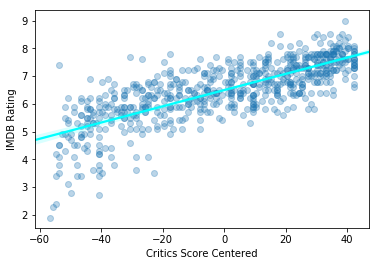

In [96]:
scat11 = sns.regplot(x="critics_score_c", y="imdb_rating", scatter=True, data=movies, 
                     scatter_kws={'alpha': .3}, line_kws={'color':'cyan'})
plt.xlabel('Critics Score Centered')
plt.ylabel('IMDB Rating')

Text(0,0.5,'IMDB Rating')

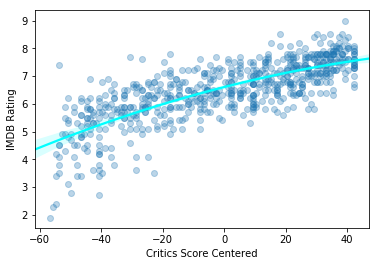

In [97]:
scat11 = sns.regplot(x="critics_score_c", y="imdb_rating", order=2, scatter=True, data=movies, 
                     scatter_kws={'alpha': .3}, line_kws={'color':'cyan'})
plt.xlabel('Critics Score Centered')
plt.ylabel('IMDB Rating')

Text(0,0.5,'IMDB Rating')

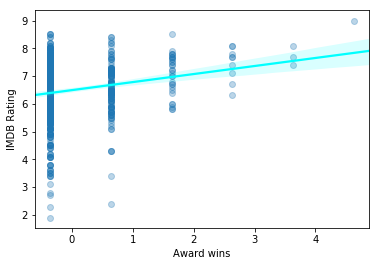

In [104]:
scat12 = sns.regplot(x="wins_c", y="imdb_rating", scatter=True, data=movies, 
                     scatter_kws={'alpha': .3}, line_kws={'color':'cyan'})
plt.xlabel('Award wins')
plt.ylabel('IMDB Rating')

Text(16.3,0.5,'IMDB Rating')

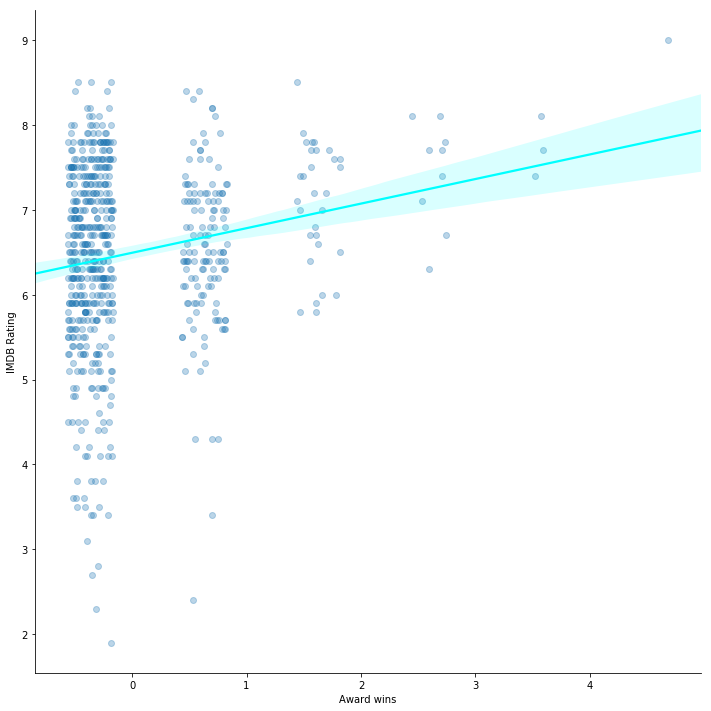

In [117]:
scat12 = sns.lmplot(x="wins_c", y="imdb_rating", scatter=True, data=movies, 
                    x_jitter=.2, scatter_kws={'alpha': .3}, size=10, line_kws={'color':'cyan'})
plt.xlabel('Award wins')
plt.ylabel('IMDB Rating')

Text(0,0.5,'IMDB Rating')

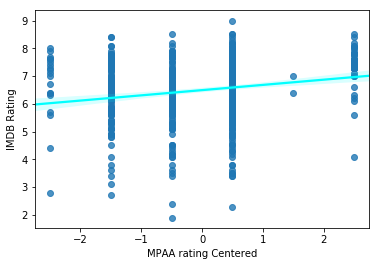

In [50]:
scat13 = sns.regplot(x="mpaa_rating_c", y="imdb_rating", scatter=True, data=movies, line_kws={'color':'cyan'})
plt.xlabel('MPAA rating Centered')
plt.ylabel('IMDB Rating')

Text(0,0.5,'IMDB Rating')

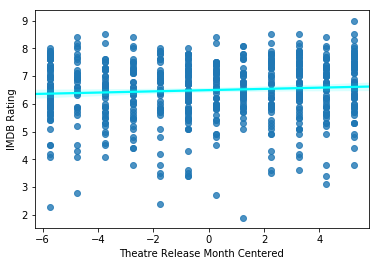

In [51]:
scat14 = sns.regplot(x="thtr_rel_month_c", y="imdb_rating", scatter=True, data=movies, line_kws={'color':'cyan'})
plt.xlabel('Theatre Release Month Centered')
plt.ylabel('IMDB Rating')

# Linear Regression Model Analysis

### IMDB user's Rating and Rotten Tomatoes' critics score
* Critics score is positively highly significant as p value is small, R-squared is high (0.585) and coef (0.0292) is positive
* I standardize critics score and do the analysis again. I get a number easier to read (0.8292)
    - Shouldn't we standardize critics score insteading of only centering it to get a better coef (the number 0.0292 gives a false sense of small correlation)?
    - I will not standardize explanatory variables again in other analyses so I won't confuse others.
* After adding in a quadratic term of _critics score_, the R-squared value goes up slightly from 0.585 to 0.593 (adjusted R-squared 0.592) and both terms are positively significant.

### IMDB user's Rating and Oscar wins or nominations
* _wins_ is positively significant as p value is small and coef is positive but R-squared is very small (0.035).

### IMDB user's Rating and movie release months (in the cinemas)
* *thtr_rel_month_c* is not signifcant as p value is > .05.

### IMDB user's Rating and MPAA Ratings
* Unlikely movie release months, MPAA ratings are positively significant although R-squared is very small (0.038, but higher than _wins_).

### Extra: IMDB user's Rating and Rotten Tomatoes' critics score + movie release months + Oscar wins or nominations
* Rotten Tomatoes' critics score and Oscar wins or nominations remain positively signifant while movie release months remain not significant.
* R-squared is 0.591 (ajdusted R squared is 0.589) is slightly higher than 0.585 for only using _critics score_.


In [52]:
# linear regression analysis
lr_c = smf.ols('imdb_rating ~ critics_score_c', data=movies).fit()
lr_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     915.9
Date:                Tue, 27 Mar 2018   Prob (F-statistic):          3.74e-126
Time:                        23:26:20   Log-Likelihood:                -689.70
No. Observations:                 651   AIC:                             1383.
Df Residuals:                     649   BIC:                             1392.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.4931      0.027    236.974      0.000       6.439       6.547
critics_score_c     0.0292      0.001     30.264      0.000       0.027       0.031
==============================================================================
Omnibus:                       46.234   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.419
Skew:                          -0.508   Prob(JB):                     4.20e-17
Kurtosis:                       4.322   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
movies['critics_score_sd'] = scale(movies['critics_score'])
ls_c_sd = smf.ols('imdb_rating ~ critics_score_sd', data=movies).fit()
ls_c_sd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     915.9
Date:                Wed, 28 Mar 2018   Prob (F-statistic):          3.74e-126
Time:                        10:05:55   Log-Likelihood:                -689.70
No. Observations:                 651   AIC:                             1383.
Df Residuals:                     649   BIC:                             1392.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.4931      0.027    236.974      0.000       6.439       6.547
critics_score_sd     0.8292      0.027     30.264      0.000       0.775       0.883
==============================================================================
Omnibus:                       46.234   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.419
Skew:                          -0.508   Prob(JB):                     4.20e-17
Kurtosis:                       4.322   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
lr_c2 = smf.ols('imdb_rating ~ critics_score_c + I(critics_score_c**2)', data=movies).fit()
lr_c2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     471.9
Date:                Tue, 27 Mar 2018   Prob (F-statistic):          3.45e-127
Time:                        23:33:30   Log-Likelihood:                -683.65
No. Observations:                 651   AIC:                             1373.
Df Residuals:                     648   BIC:                             1387.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.6025      0.042    159.050      0.000       6.521       6.684
critics_score_c             0.0282      0.001     28.123      0.000       0.026       0.030
I(critics_score_c ** 2)    -0.0001    3.9e-05     -3.487      0.001      -0.000   -5.93e-05
==============================================================================
Omnibus:                       32.238   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.345
Skew:                          -0.402   Prob(JB):                     3.18e-11
Kurtosis:                       4.066   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
lr_w = smf.ols('imdb_rating ~ wins_c', data=movies).fit()
lr_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     23.63
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           1.46e-06
Time:                        13:54:49   Log-Likelihood:                -964.54
No. Observations:                 651   AIC:                             1933.
Df Residuals:                     649   BIC:                             1942.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4931      0.042    155.362      0.000       6.411       6.575
wins_c         0.2895      0.060      4.861      0.000       0.173       0.406
==============================================================================
Omnibus:                       83.488   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.384
Skew:                          -0.871   Prob(JB):                     5.93e-28
Kurtosis:                       4.260   Cond. No.                         1.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
lr_rm = smf.ols('imdb_rating ~ thtr_rel_month_c', data=movies).fit()
lr_rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.408
Date:                Wed, 28 Mar 2018   Prob (F-statistic):             0.0653
Time:                        10:16:55   Log-Likelihood:                -974.48
No. Observations:                 651   AIC:                             1953.
Df Residuals:                     649   BIC:                             1962.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.4931      0.042    153.009      0.000       6.410       6.576
thtr_rel_month_c     0.0221      0.012      1.846      0.065      -0.001       0.046
==============================================================================
Omnibus:                       87.730   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.424
Skew:                          -0.907   Prob(JB):                     1.76e-29
Kurtosis:                       4.262   Cond. No.                         3.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
lr_mpaa = smf.ols('imdb_rating ~ mpaa_rating_c', data=movies).fit()
lr_mpaa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     25.56
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           5.58e-07
Time:                        10:29:45   Log-Likelihood:                -963.61
No. Observations:                 651   AIC:                             1931.
Df Residuals:                     649   BIC:                             1940.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.4931      0.042    155.585      0.000       6.411       6.575
mpaa_rating_c     0.1884      0.037      5.056      0.000       0.115       0.262
==============================================================================
Omnibus:                       85.235   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.056
Skew:                          -0.878   Prob(JB):                     5.74e-29
Kurtosis:                       4.309   Cond. No.                         1.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
lr_cmw = smf.ols('imdb_rating ~ wins_c + thtr_rel_month_c + critics_score_c', data=movies).fit()
lr_cmw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     311.0
Date:                Wed, 28 Mar 2018   Prob (F-statistic):          5.65e-125
Time:                        10:18:29   Log-Likelihood:                -685.56
No. Observations:                 651   AIC:                             1379.
Df Residuals:                     647   BIC:                             1397.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.4931      0.027    238.118      0.000       6.440       6.547
wins_c               0.0865      0.040      2.170      0.030       0.008       0.165
thtr_rel_month_c     0.0120      0.008      1.545      0.123      -0.003       0.027
critics_score_c      0.0288      0.001     29.571      0.000       0.027       0.031
==============================================================================
Omnibus:                       45.357   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.700
Skew:                          -0.497   Prob(JB):                     6.01e-17
Kurtosis:                       4.329   Cond. No.                         41.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
# too many models. this one again slight better and all are positively significant
# lr_cmw = smf.ols('imdb_rating ~ wins_c + mpaa_rating_c + critics_score_c', data=movies).fit()
# lr_cmw.summary()

# Evaluation Model Fit

1. q-q plot
2. standardized residuals for all observations
3. leverage plot
4. Write a few sentences describing what these plots tell you about your regression model in terms of the distribution of the residuals, model fit, influential observations, and outliers.



## q-q plot

Check if residuals are normally distributed.

Intervals on the line roughly:
- X: critics score is from -1.5 to 1.5
- X: quadratic critics score is also from -1.5 to 1.5
- X: wins is from -1.5 to 1.5, but points are more away from the line at both ends and bend downwards
- X: combined critics score, wins and release months, similar to only critics score

It is probably reasonable to assume other variables are needed to better explain the response variable.

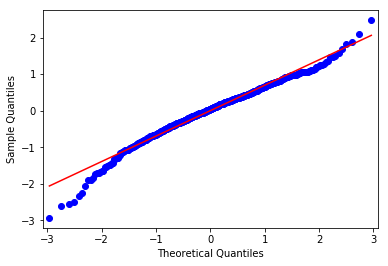

In [141]:
_ = sm.qqplot(lr_c.resid, line='r')

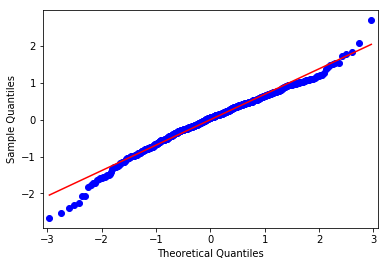

In [135]:
_ = sm.qqplot(lr_c2.resid, line='r')

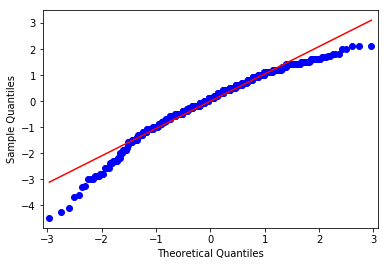

In [136]:
_ = sm.qqplot(lr_w.resid, line='r')

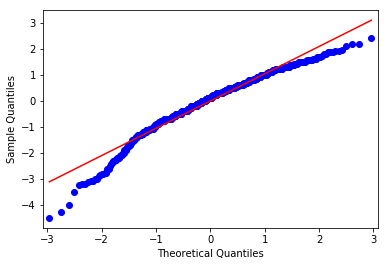

In [137]:
_ = sm.qqplot(lr_mpaa.resid, line='r')

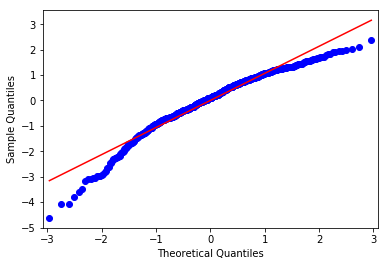

In [138]:
_ = sm.qqplot(lr_rm.resid, line='r')

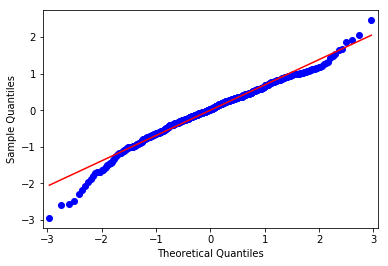

In [139]:
_ = sm.qqplot(lr_cmw.resid, line='r')

## Standardized residuals for all observations

Rules: Poor model fit if 
* more than 5% of residuals outside 2 standard deviations
* more than 1% of residuals outside 3 standard deviations

After applying these two rules, I find all models are a good fit excpet for lr_c2 (variable of quadratic critics score).

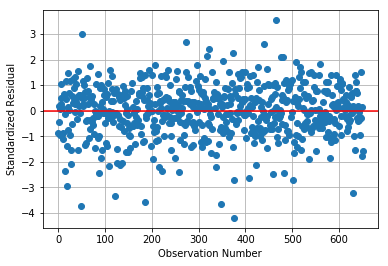

In [149]:
# simple plot of residuals
stdres=pd.DataFrame(lr_c.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.grid()

In [166]:
mot = lr_c # model for outlier test
is_high_2stds = np.sum((mot.resid_pearson >= 2) | (mot.resid_pearson <= -2)) / np.sum(mot.resid_pearson) > .05
is_high_3stds = np.sum((mot.resid_pearson >= 3) | (mot.resid_pearson <= -3)) / np.sum(mot.resid_pearson) > .01
print('Is it a poor model fit for 5% and 2 std rule?', is_high_2stds)
print('Is it a poor model fit for 1% and 3 std rule?', is_high_3stds) 

Is it a poor model fit for 5% and 2 std rule? False
Is it a poor model fit for 1% and 3 std rule? False


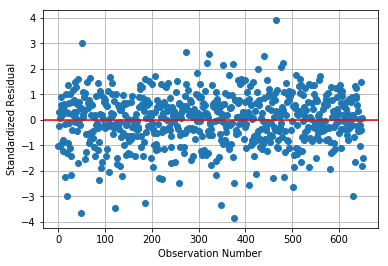

In [150]:
# simple plot of residuals
stdres=pd.DataFrame(lr_c2.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.grid()

In [167]:
# Poor model fit if 
mot = lr_c2 # model for outlier test
is_high_2stds = np.sum((mot.resid_pearson >= 2) | (mot.resid_pearson <= -2)) / np.sum(mot.resid_pearson) > .05
is_high_3stds = np.sum((mot.resid_pearson >= 3) | (mot.resid_pearson <= -3)) / np.sum(mot.resid_pearson) > .01
print('Is it a poor model fit for 5% and 2 std rule?', is_high_2stds)
print('Is it a poor model fit for 1% and 3 std rule?', is_high_3stds) 

Is it a poor model fit for 5% and 2 std rule? True
Is it a poor model fit for 1% and 3 std rule? True


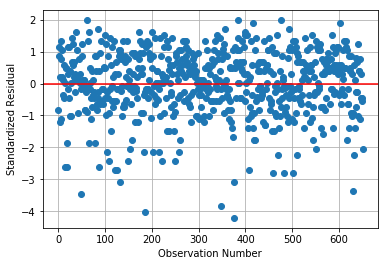

In [151]:
# simple plot of residuals
stdres=pd.DataFrame(lr_w.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.grid()

In [168]:
# Poor model fit if 
mot = lr_w # model for outlier test
is_high_2stds = np.sum((mot.resid_pearson >= 2) | (mot.resid_pearson <= -2)) / np.sum(mot.resid_pearson) > .05
is_high_3stds = np.sum((mot.resid_pearson >= 3) | (mot.resid_pearson <= -3)) / np.sum(mot.resid_pearson) > .01
print('Is it a poor model fit for 5% and 2 std rule?', is_high_2stds)
print('Is it a poor model fit for 1% and 3 std rule?', is_high_3stds) 

Is it a poor model fit for 5% and 2 std rule? False
Is it a poor model fit for 1% and 3 std rule? False


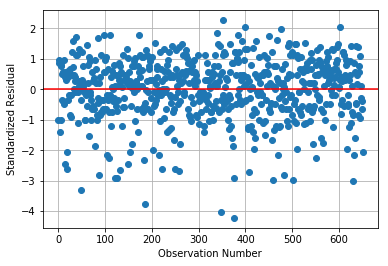

In [152]:
# simple plot of residuals
stdres=pd.DataFrame(lr_mpaa.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.grid()

In [169]:
# Poor model fit if 
mot = lr_mpaa # model for outlier test
is_high_2stds = np.sum((mot.resid_pearson >= 2) | (mot.resid_pearson <= -2)) / np.sum(mot.resid_pearson) > .05
is_high_3stds = np.sum((mot.resid_pearson >= 3) | (mot.resid_pearson <= -3)) / np.sum(mot.resid_pearson) > .01
print('Is it a poor model fit for 5% and 2 std rule?', is_high_2stds)
print('Is it a poor model fit for 1% and 3 std rule?', is_high_3stds) 

Is it a poor model fit for 5% and 2 std rule? False
Is it a poor model fit for 1% and 3 std rule? False


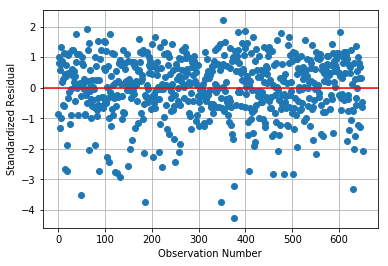

In [153]:
# simple plot of residuals
stdres=pd.DataFrame(lr_rm.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.grid()

In [170]:
# Poor model fit if 
mot = lr_rm # model for outlier test
is_high_2stds = np.sum((mot.resid_pearson >= 2) | (mot.resid_pearson <= -2)) / np.sum(mot.resid_pearson) > .05
is_high_3stds = np.sum((mot.resid_pearson >= 3) | (mot.resid_pearson <= -3)) / np.sum(mot.resid_pearson) > .01
print('Is it a poor model fit for 5% and 2 std rule?', is_high_2stds)
print('Is it a poor model fit for 1% and 3 std rule?', is_high_3stds) 

Is it a poor model fit for 5% and 2 std rule? False
Is it a poor model fit for 1% and 3 std rule? False


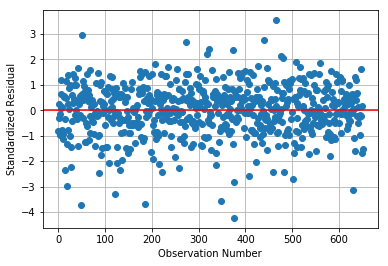

In [154]:
# simple plot of residuals
stdres=pd.DataFrame(lr_cmw.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.grid()

In [171]:
# Poor model fit if 
mot = lr_cmw # model for outlier test
is_high_2stds = np.sum((mot.resid_pearson >= 2) | (mot.resid_pearson <= -2)) / np.sum(mot.resid_pearson) > .05
is_high_3stds = np.sum((mot.resid_pearson >= 3) | (mot.resid_pearson <= -3)) / np.sum(mot.resid_pearson) > .01
print('Is it a poor model fit for 5% and 2 std rule?', is_high_2stds)
print('Is it a poor model fit for 1% and 3 std rule?', is_high_3stds) 

Is it a poor model fit for 5% and 2 std rule? False
Is it a poor model fit for 1% and 3 std rule? False


## Regression Plots and Leverage Plots

I will focus on two competing models:
    * only critics score
    * critics score + wins + thtr_rel_month_c
    * critics with quadratic terms

### Only critics score

Look at the residuals versus critics_score_c: It is more spreadout at the lower end (closed to 3 standard deviations) and it predicts the IMDB rating worse in the lower end.

Look at the leverage plot: Some observations are very far out (more than 3 standard deviations) but there are no outliers with a high leverage.

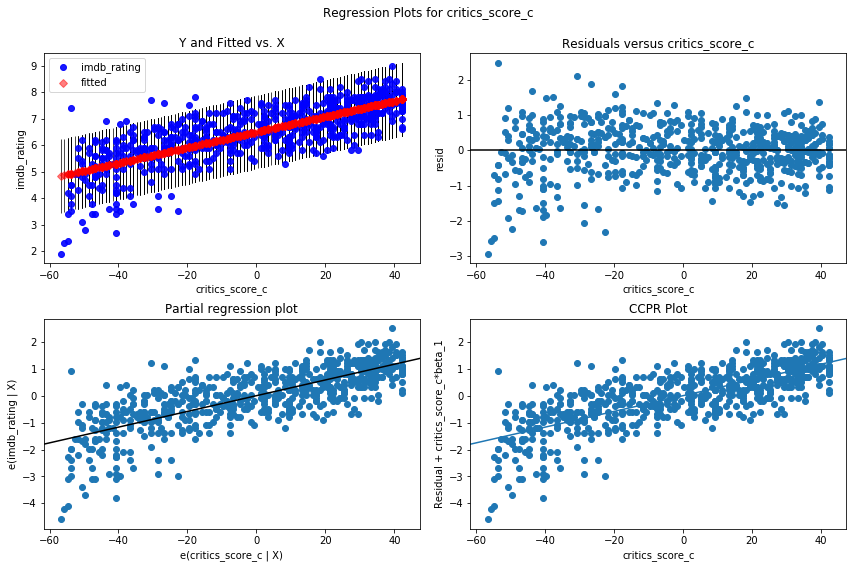

In [172]:
# additional regression diagnostic plots
fig3 = plt.figure(figsize=(12,8))
fig3 = sm.graphics.plot_regress_exog(lr_c,  'critics_score_c', fig=fig3)

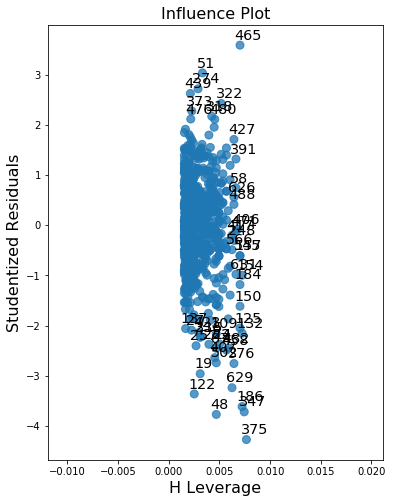

In [203]:
# leverage plot
fig4, ax = plt.subplots(figsize=(6, 8))
fig4 = sm.graphics.influence_plot(lr_c, size=8, ax=ax)

### critics score + wins + thtr_rel_month_c

#### Look at the residuals versus critics_score_c on the first of three regression plot: 

Similar to the above model, it is more spreadout at the lower end (closed to 3 standard deviations) and it predicts the IMDB rating worse in the lower end.

#### Look at the residuals versus critics_score_c on the second of three regression plot: 

It looks like a fan shape as very few movies win an Oscar award. Interesting to know strategies about dealing with this kind of data.

#### Look at the residuals versus critics_score_c on the third of three regression plot: 

Movie release dates seem evenly spread out from January to December.


### Leverage plot:

Look at the leverage plot: Again, some observations are very far out (more than 3 standard deviations) and they are likely to come from the critics score variable. In this plot, there are four points away from others with a high leverage; one is particularly far out but they are all located within 2 standard deviations so not outliers.


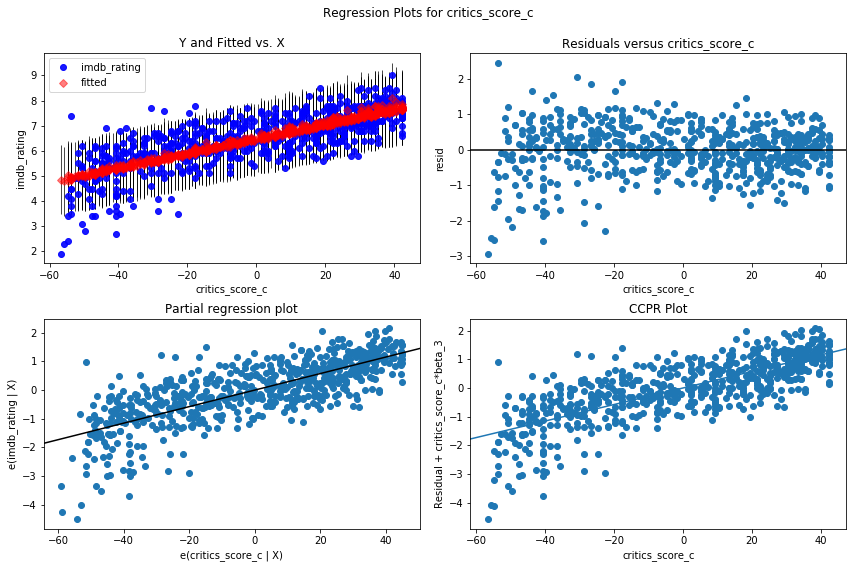

In [204]:
fig3 = plt.figure(figsize=(12,8))
fig3 = sm.graphics.plot_regress_exog(lr_cmw,  'critics_score_c', fig=fig3)

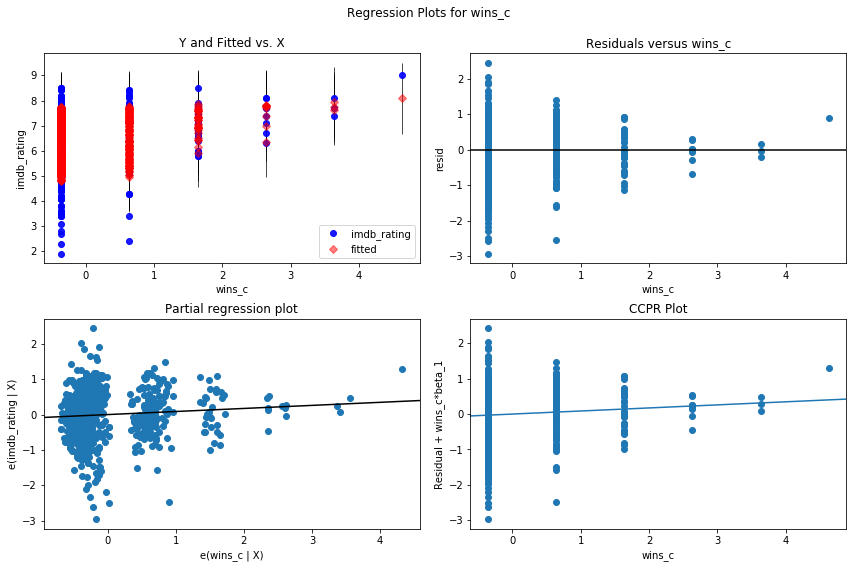

In [205]:
fig3 = plt.figure(figsize=(12,8))
fig3 = sm.graphics.plot_regress_exog(lr_cmw,  'wins_c', fig=fig3)

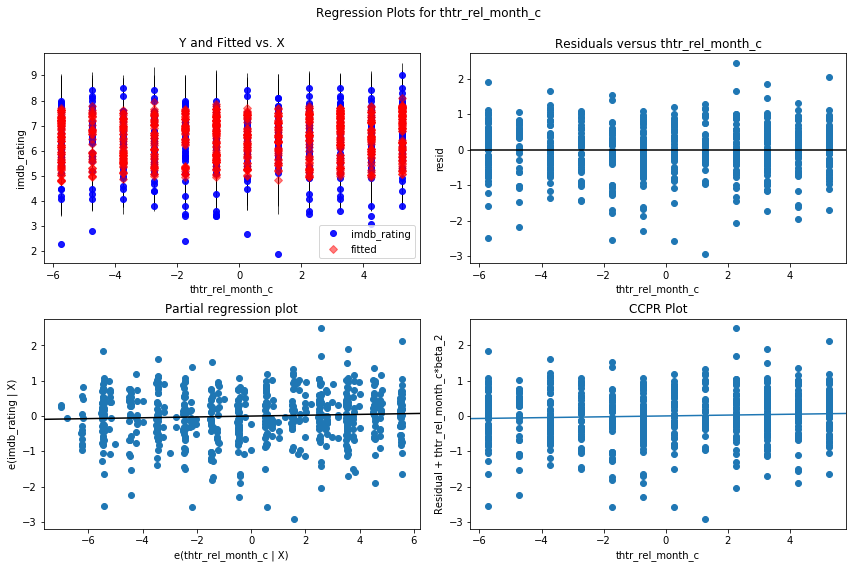

In [206]:
fig3 = plt.figure(figsize=(12,8))
fig3 = sm.graphics.plot_regress_exog(lr_cmw,  'thtr_rel_month_c', fig=fig3)

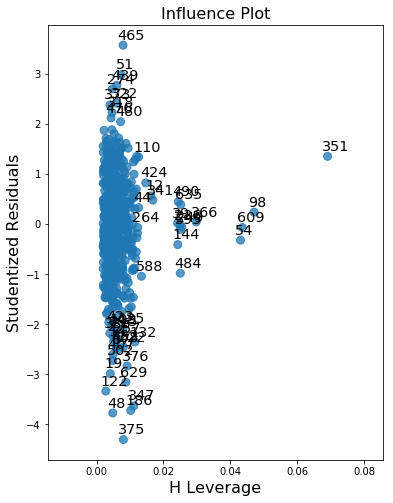

In [207]:
# leverage plot
fig4, ax = plt.subplots(figsize=(6, 8))
fig4 = sm.graphics.influence_plot(lr_cmw, size=8, ax=ax)

### critics with quadratic terms

I am keeping plots for the quadratic model to constrast the non-quadratic model's.

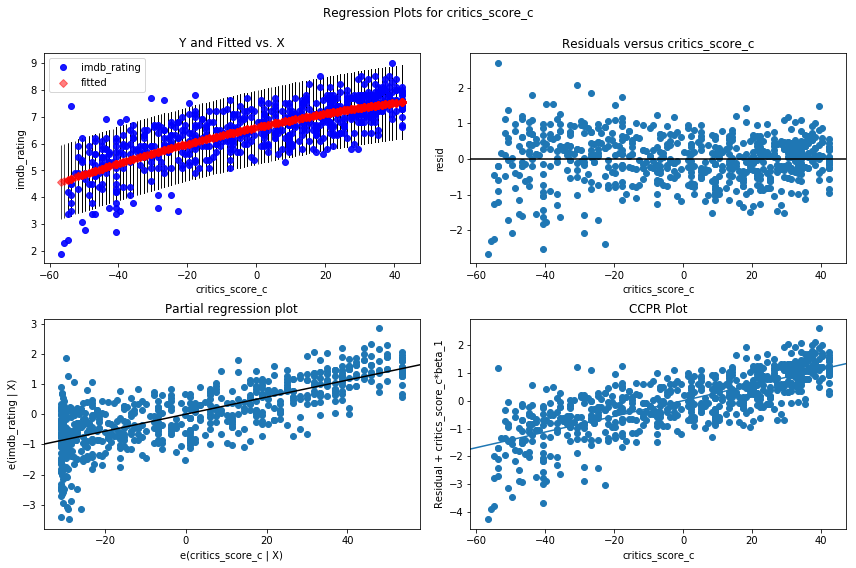

In [208]:
fig3 = plt.figure(figsize=(12,8))
fig3 = sm.graphics.plot_regress_exog(lr_c2,  'critics_score_c', fig=fig3)

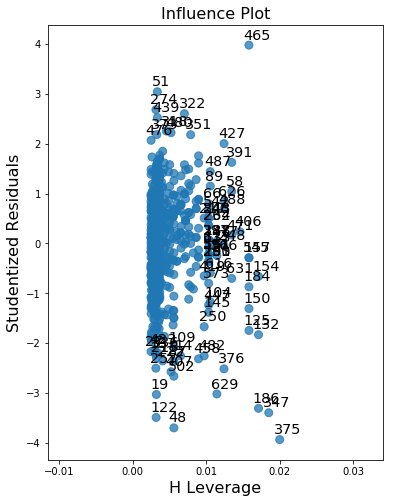

In [209]:
# leverage plot
fig4, ax = plt.subplots(figsize=(6, 8))
fig4 = sm.graphics.influence_plot(lr_c2, size=8, ax=ax)

# Summary

After adjusting for potential confounding factors, like the quadratic term of "critics score", "critics score" (beta1 = 0.0292, or 0.8292 for the standardized "critics score", p is close to 0) is significantly and positively associated with IMDB user ratings. Several other variables like Oscar wins/nominations and MPAA ratings are also significantly associated with IMDB user ratings but contribute very little to R squared so I will keep the simplest model with only one variable "critics score".